In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import clear_output
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount("drive")

Mounted at drive


In [3]:
!unzip drive/MyDrive/Datasets/lc/FPR/FPRDataset.zip
clear_output()

In [2]:
print("Test Nodule:",len(os.listdir("FPRDataset/test/nodule")))
print("Test Non-Nodule:",len(os.listdir("FPRDataset/test/non-nodule")))

Test Nodule: 1709
Test Non-Nodule: 2500


In [15]:
BATCH_SIZE = 96
generator = ImageDataGenerator(rescale=1./255)

trainData = generator.flow_from_directory(
    "FPRDataset/train",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    shuffle = False
)

testData = generator.flow_from_directory(
    "FPRDataset/test",
    target_size=(50,50),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='binary',
    shuffle = False
)

Found 12626 images belonging to 2 classes.
Found 4209 images belonging to 2 classes.


In [16]:
print(trainData.class_indices)
print(testData.class_indices)

{'nodule': 0, 'non-nodule': 1}
{'nodule': 0, 'non-nodule': 1}


In [17]:
model = tf.keras.models.load_model("drive/MyDrive/Datasets/lc/FPR/Training_Logs/2nd_Trial/best_checkpoint_model.h5")
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 50, 50, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 48, 48, 50)        500       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 50)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 22, 22, 64)        28864     
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                       

In [18]:
with tf.device("/device:GPU:0"):
  testPred = model.predict(testData)

In [19]:
with tf.device("/device:GPU:0"):
  trainPred = model.predict(trainData)

In [20]:
testPred

array([[7.3395605e-04],
       [2.2489522e-03],
       [1.4850867e-01],
       ...,
       [9.9740124e-01],
       [5.7495576e-01],
       [9.5839179e-01]], dtype=float32)

In [21]:
test_y_true = testData.classes
test_y_pred = np.array([int(x>=0.5) for x in testPred])

In [22]:
train_y_true = trainData.classes
train_y_pred = np.array([int(x>=0.5) for x in trainPred])

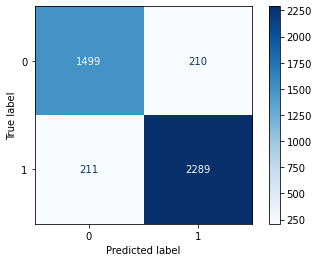

In [29]:
ConfusionMatrixDisplay.from_predictions(test_y_true, test_y_pred, cmap='Blues')

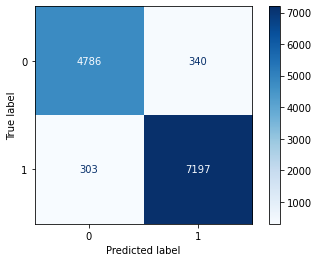

In [30]:
ConfusionMatrixDisplay.from_predictions(train_y_true, train_y_pred, cmap='Blues')